In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
client_df = pd.read_csv("/Users/arjunreddypulugu/Desktop/client_data.csv")
price_df = pd.read_csv("/Users/arjunreddypulugu/Desktop/price_data.csv")

In [65]:
pd.set_option('display.max_columns', 35)

In [5]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [6]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [7]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [8]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [9]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [18]:
churn = client_df[['id', 'churn']]

In [19]:
churn.columns = ['company', 'churn']

In [20]:
churn.head()

,company,churn
0,24011ae4ebbe3035111d65fa7c15bc57,1
1,d29c2c54acc38ff3c0614d0a653813dd,0
2,764c75f661154dac3a6c254cd082ea7d,0
3,bba03439a292a1e166f80264c16191cb,0
4,149d57cf92fc41cf94415803a877cb4b,0


In [23]:
churn_tot = churn.groupby(churn['churn']).count()

In [24]:
churn_tot.head()

,company
churn,
0,13187
1,1419


In [32]:
churn_true = churn_tot['company'].iloc[1]
churn_false = churn_tot['company'].iloc[0]

In [31]:
churn_percentage = (churn_true/churn['company'].count())*100
churn_percentage

9.715185540188962

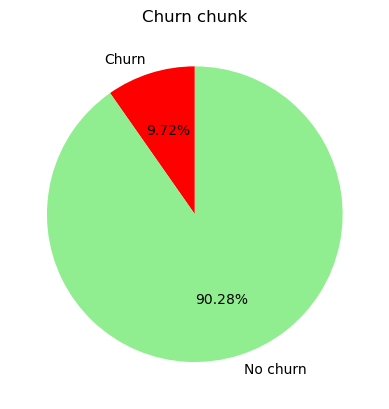

In [36]:
plt.pie((churn_true, churn_false), labels=('Churn', 'No churn'), autopct='%1.2f%%', startangle=90, colors=['red', 'lightgreen'])

plt.title('Churn chunk')

plt.show()


In [37]:
client_df.shape, price_df.shape

((14606, 26), (193002, 8))

In [88]:
merge_df = client_df.merge(price_df, on = 'id', how = 'left')


In [59]:
merge_df['total_price'] = merge_df['price_off_peak_fix'] + merge_df['price_peak_fix']+ merge_df['price_mid_peak_fix']+merge_df['price_off_peak_var']+merge_df['price_mid_peak_var']+merge_df['price_peak_var']

In [61]:
churn_v_price = merge_df[['churn', 'total_price']]

In [55]:
churn_v_avg_price =churn_v_price_energy.groupby('churn').mean('total_price')

In [62]:
churn_v_price

,churn,total_price
0,1,81.432846
1,1,81.432846
2,1,81.432841
3,1,81.432841
4,1,81.432841
...,...,...
175144,0,44.519797
175145,0,44.519797
175146,0,44.519797
175147,0,44.519797


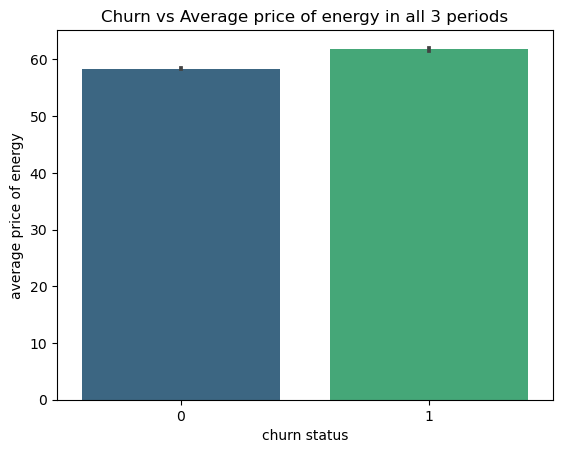

In [63]:
sns.barplot(x='churn' , y='total_price' , data=churn_v_price, palette='viridis')

plt.xlabel('churn status')
plt.ylabel('average price of energy')
plt.title('Churn vs Average price of energy in all 3 periods')


plt.show()


In [91]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


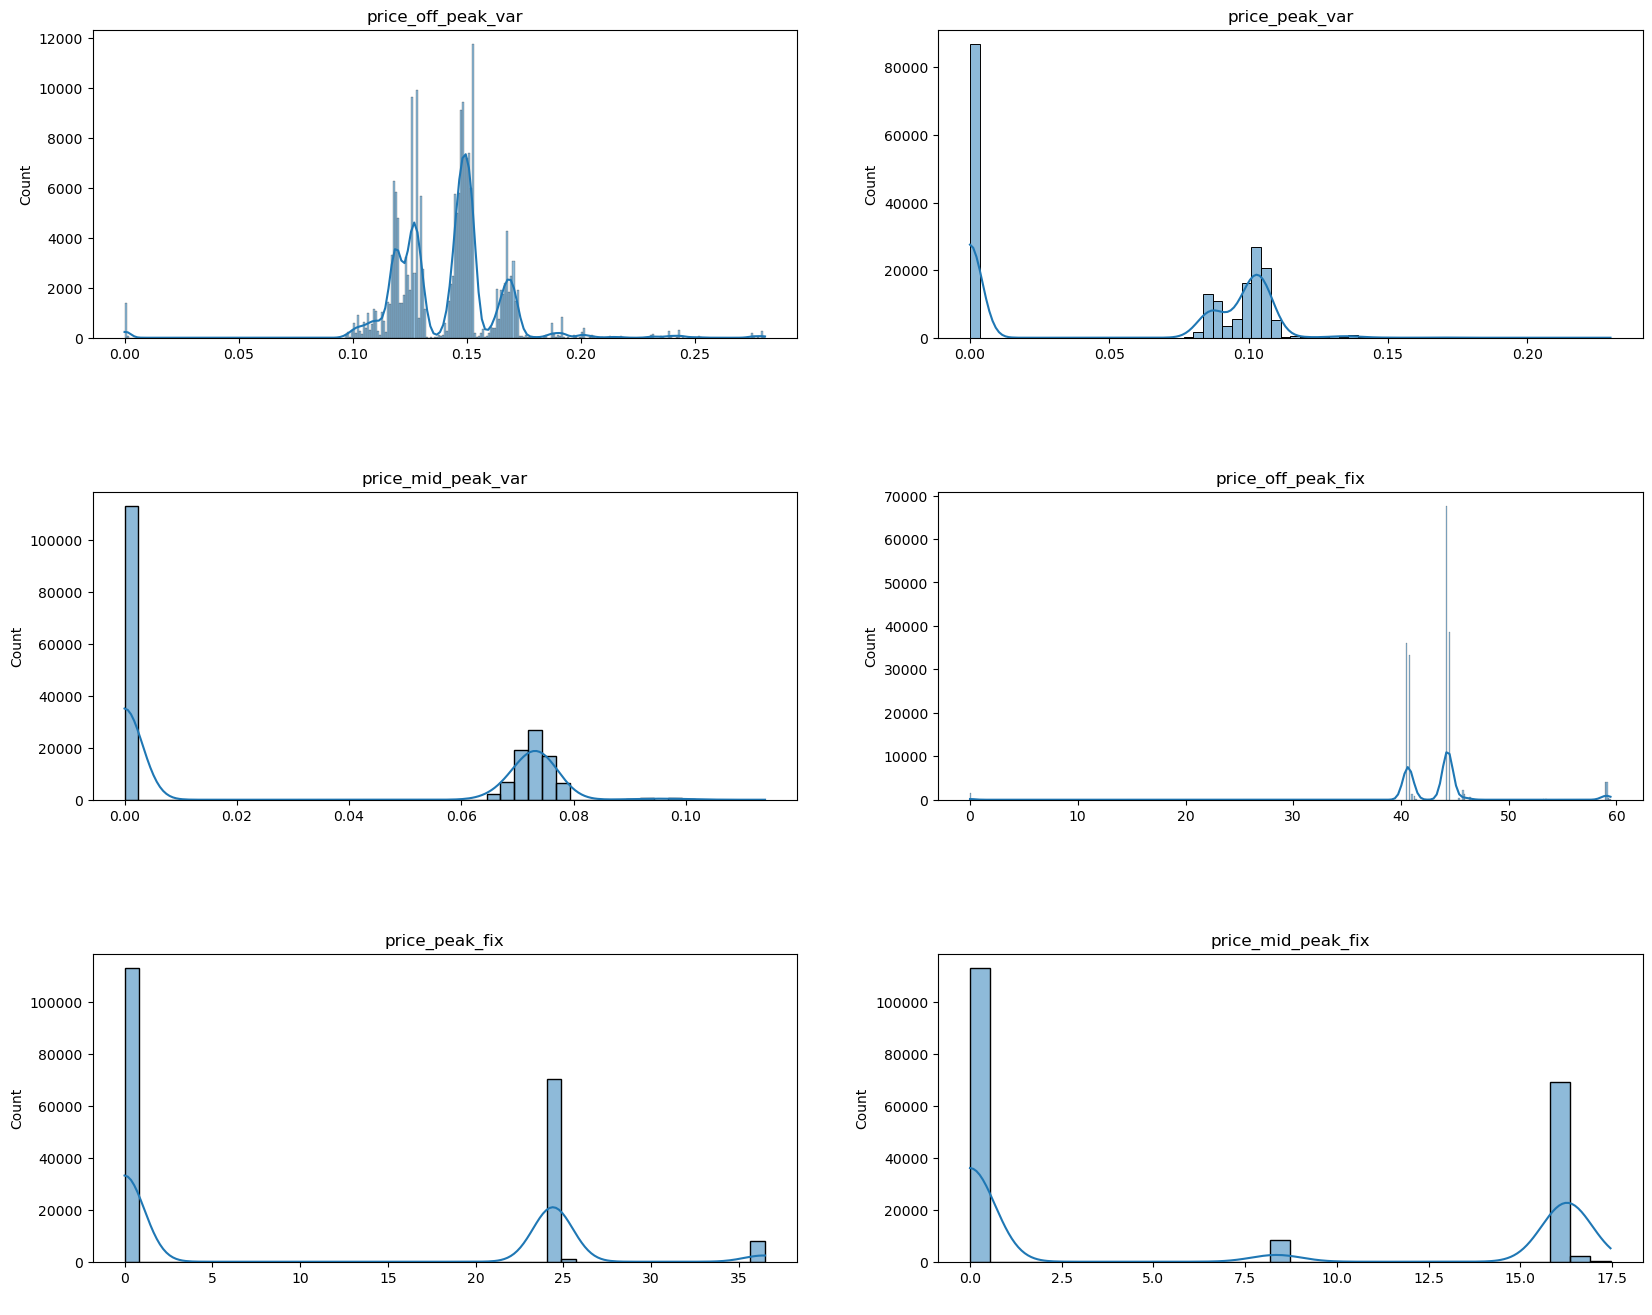

In [95]:
fig, axes = plt.subplots(3,2, figsize = (20,16))
fig.subplots_adjust(hspace =0.5)
axes =axes.flatten()

for i, column in enumerate(price_df.select_dtypes(include =[np.number])):
    ax = axes[i]
    sns.histplot(price_df[column], ax=ax, kde=True)
    ax.set_title( column)
    ax.set_xlabel(' ')

In [98]:
merge_df = client_df.merge(price_df, on = 'id', how = 'left')

In [100]:
merge_df_num = merge_df.select_dtypes(include =[np.number])

In [103]:
merge_df_num.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,0.0,25.44,25.44,2,678.99,3,43.648,1,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,0.0,25.44,25.44,2,678.99,3,43.648,1,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,0.0,25.44,25.44,2,678.99,3,43.648,1,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,0.0,25.44,25.44,2,678.99,3,43.648,1,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,0.0,25.44,25.44,2,678.99,3,43.648,1,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [104]:
corr_df = merge_df_num[['churn','price_off_peak_var', 'price_peak_var', 'price_mid_peak_var','price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix' ]]

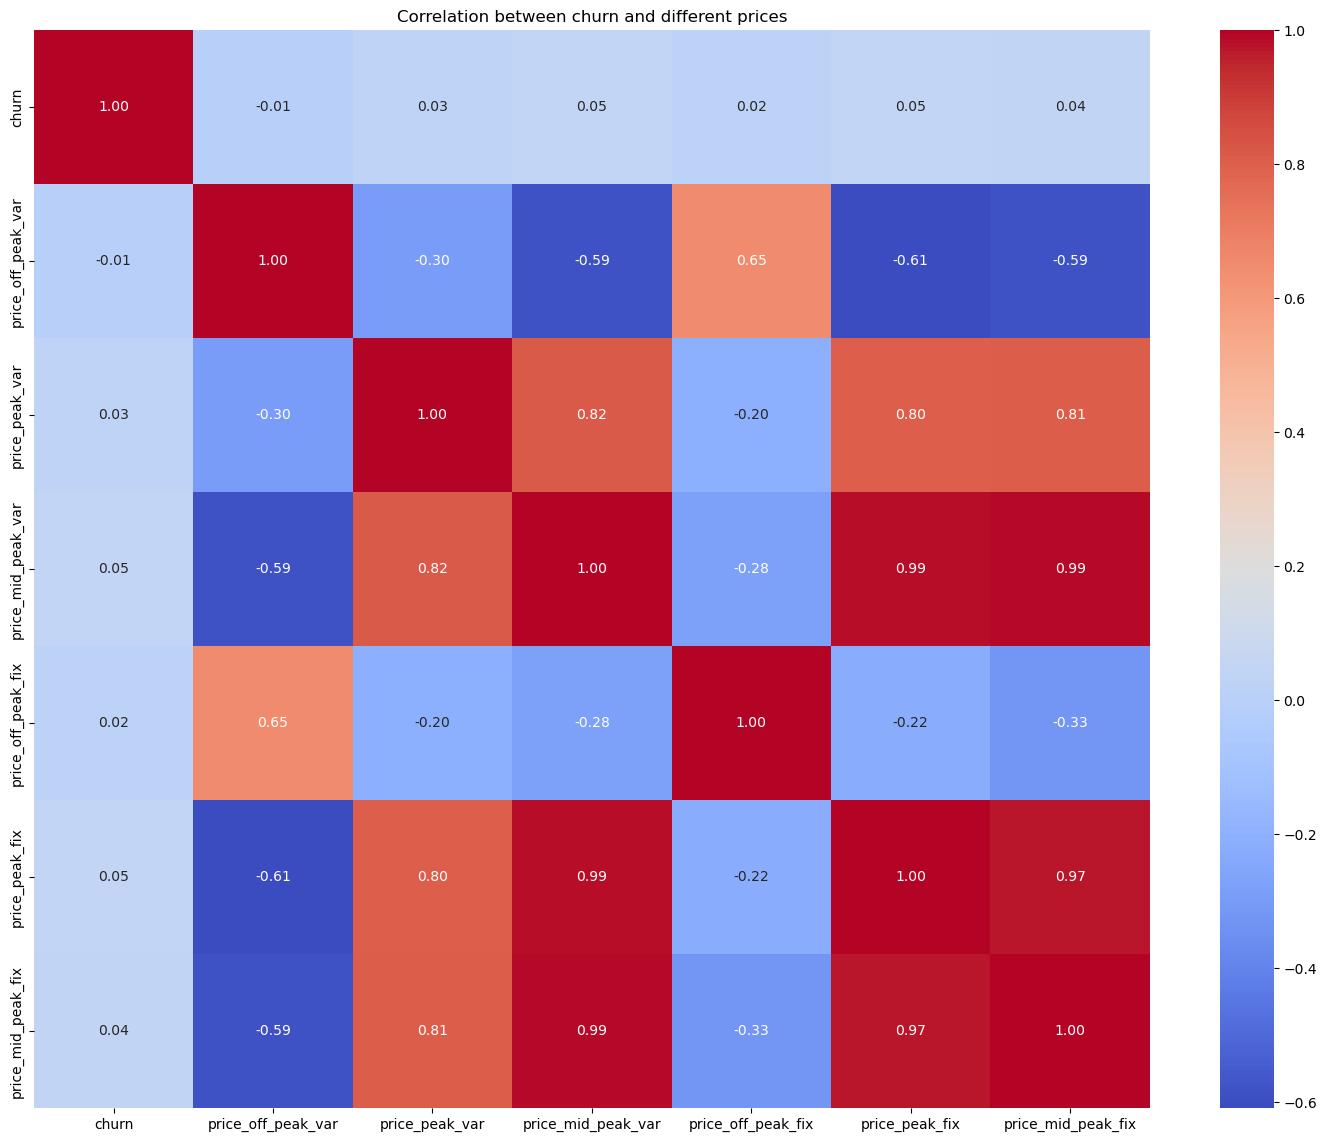

In [106]:
corr_matrix = corr_df.corr()

plt.figure(figsize = (18, 14))
sns.heatmap(corr_matrix, annot=True, fmt= '.2f', cmap= 'coolwarm')
plt.title('Correlation between churn and different prices')
plt.show()

In [107]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221
